# Strategy:
I will clean and reformat the data. Then I will analyze different characterisitcs of thhe data and try to connect some various components together in order to obtain a valuable conclusion.

In [1]:
import numpy as np 
import pandas as pd 

# Loading and Cleaning the data
- Column names are a bit wierd and verbose which should be taken care of
- Also, most columns are actually options of the same question which it would be helpful to break dwon annd go over each individual question before diving into more complicated inter-patterns within the data.
- The majority of missing values are because of the multi optional questions but they are some uni-option question with missing values that need imputing.

In [2]:
# Loading the reponse Data
res = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory=False)

# Formating the columns for comfortable access
column_dict = {}

# Getting the necessary dictionary needed to change the column names
for col in res.columns:
    n_col = col.replace('_Part_', '.')
    n_col = n_col.replace('_', '.')
    n_col = n_col.replace('OTHER', '0')
    column_dict[col] = n_col
    
# Rename the columns
res.rename(columns=column_dict, inplace=True)

# Getting the uni-option columns/questions
uo_cols = []
for col in res.columns[1:]:
    if not '.' in col:
        uo_cols.append(col)

# Break Down:
Functions below are used to format the data into a more readable way.

In [3]:
def break_down(start_index: int, end_index: int):
    """
        Subsetting the dataframe into questions and binarizing the columns
        
        input: 
            start_index = The start of the subset index
            end_index = The end of the subset index
            
        returns:
            dataframe containing the reponses to a given question
    """
    subset = res.iloc[1:, start_index:end_index].copy()
    
    
    return binary_formatting(subset)

def binary_formatting(df: pd.DataFrame):
    """
        Binarizing the columns, changing the column names
        
        input:
            df = Dataframe to binarize
        
        returns:
            A dataframe of binary columns with answers as their column names
    """
    col_dict = {}
    for col in df.columns:
        val = np.nan
        if pd.isna(df[col].unique()[0]):
            val = df[col].unique()[1]
        else:
            val = df[col].unique()[0]
        
        
        if val == np.nan:
            df[col] = df[col].map({np.nan: 0})
        else:
            df[col] = df[col].map({val: 1, np.nan: 0})
        
        col_dict[col] = val

    df.rename(columns=col_dict, inplace=True)
    
    return df

In [4]:
res.iloc[:3, 7:20]

,Q7.1,Q7.2,Q7.3,Q7.4,Q7.5,Q7.6,Q7.7,Q7.8,Q7.9,Q7.10,Q7.11,Q7.12,Q7.0
0,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Break down of questions
The question with multiple aswers should be formatted and analyzed seperately. Covering the uni-option questions:
- Q1: Age 
- Q2: Geneder 
- Q3: Country 
- Q4: Education
- Q5: Role
- Q6: Programming years
- Q8: Recommended Programming Language for a beginner
- Q11: Most Common setup
- Q13: # of TPU uses
- Q15: # of years using ML algorithms
- Q20: # of employees in ur company
- Q21: # of DS people in ur company
- Q22: Does your workplace use ML?
- Q24: Salary
- Q25: ML expenses
- Q30: Most frequent used Big Data tool
- Q32: Most frequent used BI tool
- Q38: Primary tool for analyzing data

In [5]:
uo_cols # Uni-option columns

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q8',
 'Q11',
 'Q13',
 'Q15',
 'Q20',
 'Q21',
 'Q22',
 'Q24',
 'Q25',
 'Q30',
 'Q32',
 'Q38']

In [6]:
# Mulit-Option Question Break downs
language = break_down(7, 20) # Q7
ide = break_down(21, 33) # Q9
host_prod = break_down(33, 47) # Q10
spec_hardware = break_down(48, 52) # Q12: TPU, GPU
viz_lib = break_down(53, 65) # Q14: Which data visualization lib do u use?
ml_lib =  break_down(66, 82) # Q16: Regularly used ML libraries
algo = break_down(83, 94) # Q17: Regularly used ML Algorithms
comp_vision = break_down(94, 101) # Q18: Algorithms related to Computer Vision
nlp = break_down(101, 107) # Q19: Algorithms related to NLP
work_activity = break_down(110, 118) # Q23
cloud_platform = break_down(120, 132) # 26.a

# Brain Storming
I don't believe anyone knows if they are going to find something significant when they go through a dataset. I hypothesize that analysis techniques aside, Brain Storming on the data could help the creeative process. And by brainstorming, I mean going through data and trying to challenge your thoughts on the matter.

In [7]:
import matplotlib.pyplot as plt

# Age:
- Majority of Kagglers are between 25-29 age range
- Interestingly they are some 70+ participatin in Kaggle.

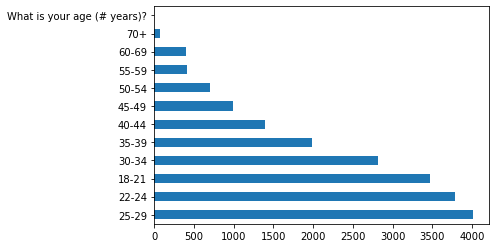

In [8]:
# Graphing the occurances
res.loc[:,'Q1'].value_counts().plot.barh()

# Gender:
- There is an obvious gender gap within the Kaggle community

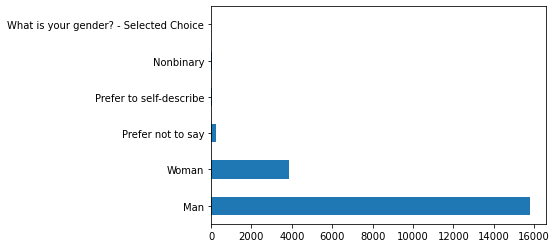

In [9]:
# Graphing the occurances
res.loc[:,'Q2'].value_counts().plot.barh()

# Country:
- They are 55 different countries (Counting the others) which people participate from.
- In the first 10 countries with the most Kagglers, India is at the lead. Which is interesting since India and Nigeria are the only two non-first world countries in top 10. In future, we might change our definition of first and second world.
- Based on China's economy and tech initiatives, one might expect to see China in top five. Yet, interestingly China is below US and India with a large difference.
- Looking at the data, we can see that people from all over the world are participating

In [10]:
# Number of difffernet countries
print('# of different countries: ', res.loc[:,'Q3'].unique().shape[0] - 1)
res[res['Q3'] == 'United Kingdom of Great Britain and Northern Ireland']

# Shortening some of the names
country_dict = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'US',
    'Republic of Korea': 'Korea',
    'United Arab Emirates': 'UAE',
    'South Korea': 'Korea',
    'Republic of Korea': 'Korea',
    'Iran, Islamic Republic of...': 'Iran'
}
res['Q3'] = res['Q3'].replace(country_dict)

# of different countries:  55


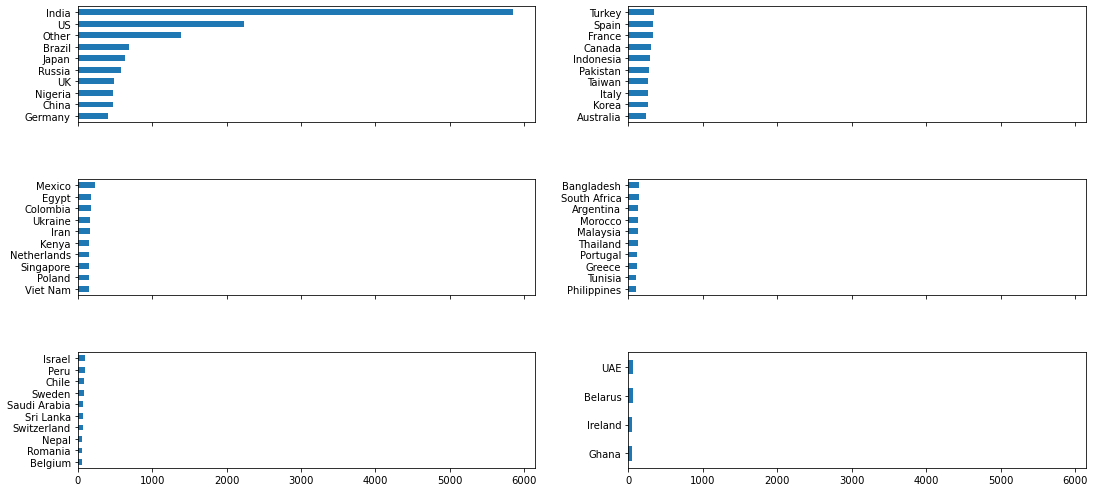

In [11]:
fig, (r1, r2, r3) = plt.subplots(3, 2, figsize=(7,7), sharex=True)
fig.tight_layout()

res.loc[:,'Q3'].value_counts()[:10].sort_values().plot.barh(ax=r1[0])
res.loc[:,'Q3'].value_counts()[10:20].sort_values().plot.barh(ax=r1[1])
res.loc[:,'Q3'].value_counts()[20:30].sort_values().plot.barh(ax=r2[0])
res.loc[:,'Q3'].value_counts()[30:40].sort_values().plot.barh(ax=r2[1])
res.loc[:,'Q3'].value_counts()[40:50].sort_values().plot.barh(ax=r3[0])
res.loc[:,'Q3'].value_counts()[50:-1].sort_values().plot.barh(ax=r3[1])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=None, hspace=0.5)

# Education
- The Majority of Kagglers have a Master's Degree and Bachelor. This kind of makes sense based on the age data. ages 18-25 are the range for these students.
`PLot the inner connections between age and degree`

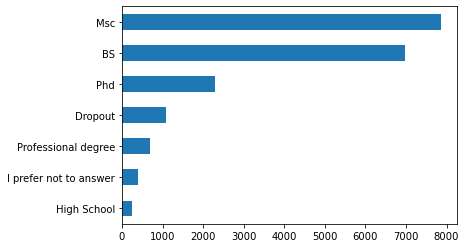

In [12]:
# Renaming the Values
res.loc[:, 'Q4'] = res.loc[:, 'Q4'].replace({
    'Doctoral degree': 'Phd',
    'Master’s degree': 'Msc',
    'Bachelor’s degree': 'BS',
    'No formal education past high school': 'High School',
    'Some college/university study without earning a bachelor’s degree': 'Dropout'
})

# Plotting the occurances
res.loc[:, 'Q4'].value_counts()[:-1]. sort_values().plot.barh()

# Language
- Python is the most used language, almost double the second language (SQL).
- One importantthing to note is that they are some languages in the listing which are not widely used in Data Science but participants have indicated that they use it. And alos some of these languages are more technical than the other ones, in a sense they can be a prerequiste for some other programming languages. For instance, if one knows C then he/she knows C++ and possibly Python.
- It might be worth while to analyze what are the alternative programming language for people who does not use the populer one. 
- I bielive, assumptions could be made just by counting the number of programming languages that poeple know. If they know more than a certain number then they are probably experts and they have been coding for a long time.

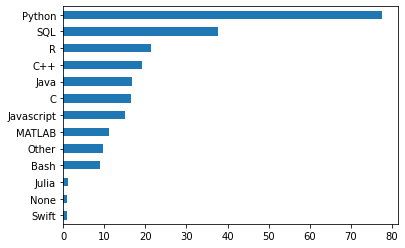

In [13]:
(language.sum().sort_values(ascending=True)/ language.shape[0] * 100).plot.barh()

## What is the alternative to Python?
- Firstly, they is a minority of people who do not use Python on a regular basis.
- And people who don't use Python, use SQL and R for Data-related projects.
- Java is another alternative which is probably used because of its presence.

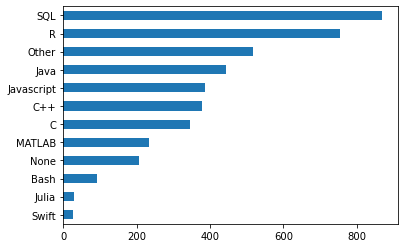

In [14]:
(language[language['Python'] == 0].groupby(['Python']).sum()).iloc[0].sort_values().plot.barh()

## Given that you know one language, what are the chances that you know multiple languages?
- Based on the data, poeple who use swift regularly know almost 4 programming languages.
- Julia Javascript, Java, and C/C++ follow after swift in the average number of programming languages developers use.
- Now thigns get interesting when it comes to Python, R, and SQL:
    - Python has the lowest average among the programming languages. This shows that lots of people who have learned Python had not seen the point in learning another programming languages.
    - Now between these three, SQL has the highest average, this is probably because of the fact that SQL is limited in the paradigm of things it can do (compared to OO languages R and Python). And people have seeked to learn another programming languages.
    - Same logic apples to R as well, since it is not a general purpose programming language, Kagglers have learned alternatives.
    - All these add up to say that Python is the most prefered choice for data-related projects based on the data sicne it has discouraged people from learning other technologies.

In [15]:
def average_lang_num(lang):
    return language[language[lang] == 1].sum(axis=1).mean()

for lang in language.columns:
    print(f'Average number of languages that one knows given that they know [{lang}] is {round(average_lang_num(lang) - 1,2)}')

Average number of languages that one knows given that they know [Python] is 1.78
Average number of languages that one knows given that they know [R] is 2.36
Average number of languages that one knows given that they know [SQL] is 2.54
Average number of languages that one knows given that they know [C] is 3.22
Average number of languages that one knows given that they know [C++] is 3.04
Average number of languages that one knows given that they know [Java] is 3.19
Average number of languages that one knows given that they know [Javascript] is 3.23
Average number of languages that one knows given that they know [Julia] is 3.4
Average number of languages that one knows given that they know [Swift] is 3.77
Average number of languages that one knows given that they know [Bash] is 3.2
Average number of languages that one knows given that they know [MATLAB] is 2.89
Average number of languages that one knows given that they know [None] is 0.0
Average number of languages that one knows given th

# IDE
- Jupyter Products are widely used. It is important to note that this decision is affected by the popular programming languages. Also, Jupyter provides support for pretty much all the top used languages.
- The interesting thing to see is that Python IDE users are diverse, some use Jupyter, code, Pycharm, and Spyder.
- I postulate that people who use Vim/Emacs and Visual Studio are older than others.

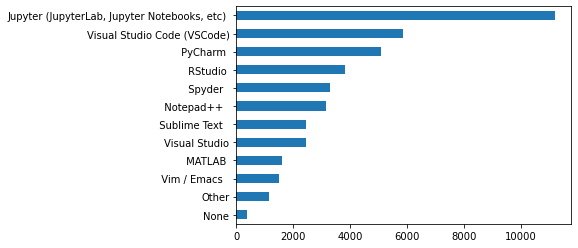

In [16]:
ide.sum().sort_values(ascending=True).plot.barh()

Interestingly, most poeple who use Vim/Emacs are between 25-29, yet my postulation is not necessarily wrong since most users are in their thirties. Also, the majority of surveyed people were in 22-24 age range and it is still 4th in the place.

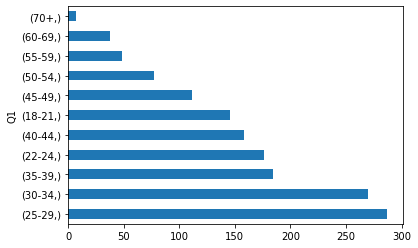

In [17]:
res.loc[ide[ide['  Vim / Emacs  '] == 1].index, ['Q1']].value_counts().plot.barh()

## What is the alternative IDE for MATLAB users?
- Octave, is a non-paid version of MATLAB and it is one of the possible ides used by Kagglers.
- Jupyter has support for it yet there are only ~650 MATLAB programmers who use other products than MATLAB IDE.

In [18]:
matlab_users= language[language['MATLAB'] == 1].shape[0]
ide_users = ide[ide[' MATLAB '] == 1].shape[0]
print(f'{matlab_users} claimed they use MATLAB regularly yet {ide_users} use MATLAB as their editor!')

2217 claimed they use MATLAB regularly yet 1604 use MATLAB as their editor!


In [19]:
ide.sum(axis=1).mean(), ide.sum(axis=1).min(), ide.sum(axis=1).max()

(2.0953284088640447, 0, 11)

In [20]:
ide.sum(axis=1).value_counts()

2     5267
1     5199
3     4029
0     2463
4     1918
5      715
6      289
7       99
8       37
9       10
10       8
11       2
dtype: int64

# Algorithms

In [21]:
algo

,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",Bayesian Approaches,Evolutionary Approaches,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,"Transformer Networks (BERT, gpt-3, etc)",None,Other
1,1,1,1,0,1,1,0,1,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20032,0,0,0,0,0,0,0,0,0,0,0
20033,1,0,0,0,1,1,0,0,1,0,0
20034,0,0,0,0,0,0,0,0,0,0,0
20035,1,1,0,0,1,1,0,1,0,0,0
